<img src='images/pic1.jpg'/>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#command to install: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
#from skmultilearn.adapt import mlknn
#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import BinaryRelevance
#from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [2]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    i = 1
    for df in pd.read_csv('Train.csv', names = ['Id', 'Title', 'Body', 'Tags'], chunksize = chunksize, iterator = True, encoding = 'utf-8'):
        print('{} rows'.format(i*chunksize))
        i = i+1
        #data is the table name
        df.to_sql('data', disk_engine, if_exists = 'append')
    print("Time taken to add the data to sqlite is: ",dt.datetime.now() - start)
        
        
    

<h3> 3.1.2 Counting the number of rows </h3>

In [ ]:
if os.path.isfile('train.db'):
    con = sqlite3.connect('train.db')
    start = dt.datetime.now()
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    rows = pd.read_sql_query("""SELECT * FROM data""", con)
    print(num_rows)
    print(type(num_rows))
    print(num_rows.values)
    print('Number of rows present in the database are: ',num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows: ", dt.datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

In [4]:
rows.head()

,index,Id,Title,Body,Tags
0,0,Id,Title,Body,Tags
1,1,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
2,2,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
3,3,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
4,4,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding


<h3>3.1.3 Checking for duplicates </h3>

In [ ]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('train.db'):
    con = sqlite3.connect('train.db')
    start = dt.datetime.now()
    num_of_dup = pd.read_sql_query("""SELECT Title, Body, Tags, count(*) as CNT_DUP FROM data GROUP BY Title, Body, Tags""", con)
    con.close()
    print("Time taken to read the duplicates are: ", dt.datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")    

In [7]:
num_of_dup.head(10)
# we can observe that there are duplicates

,Title,Body,Tags,CNT_DUP
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2
5,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk,1
6,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web,3
7,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1
8,Countable subadditivity of the Lebesgue measure,<p>Let $\lbrace F_n \rbrace$ be a sequence of ...,real-analysis measure-theory,3
9,HQL equivalent to this Sql Query,"<pre><code>select part.PaId,part.PaName,part.P...",hibernate hql,2


In [8]:
num_of_dup.shape

(4206315, 4)

In [9]:
print('Number of duplicate questions: ',num_rows['count(*)'].values[0] - num_of_dup.shape[0], '(', (1-(num_of_dup.shape[0]/num_rows['count(*)'].values[0]))*100, '%)')

Number of duplicate questions:  1827881 ( 30.292038906260256 %)


In [10]:
# number of times each question appeared in our database
num_of_dup.CNT_DUP.value_counts()
#value_counts() gives the number of times the question occurred

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: CNT_DUP, dtype: int64

In [11]:
start = dt.datetime.now()
#adding a new column/feature to count the number of tags each question have
#fillna - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
#str is used for series of data.
num_of_dup["tag_count"] = num_of_dup["Tags"].str.split(" ").str.len().fillna(0).astype(np.int64)
print("Time taken to count the number of tags for each question is: ", dt.datetime.now() - start)
num_of_dup.head()

Time taken to count the number of tags for each question is:  0:00:40.357377


,Title,Body,Tags,CNT_DUP,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


In [12]:
# distribution of number of tags per question
num_of_dup.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
0          7
Name: tag_count, dtype: int64

In [13]:
num_of_dup.columns

Index(['Title', 'Body', 'Tags', 'CNT_DUP', 'tag_count'], dtype='object')

In [14]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine('sqlite:///train_no_dup.db')  #created a new db
    no_dup = pd.DataFrame(num_of_dup, columns = ['Title', 'Body', 'Tags'])  #data frame created with those columns
    no_dup.to_sql('no_dup_train',disk_dup)   #create a table

In [22]:
no_dup.columns

NameError: name 'no_dup' is not defined

In [23]:
test = pd.DataFrame(num_of_dup['Tags'])
test.head()

,Tags
0,c++ c
1,c# silverlight data-binding
2,c# silverlight data-binding columns
3,jsp jstl
4,java jdbc


In [15]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.
if os.path.isfile('train_no_dup.db'):
    con = sqlite3.connect('train_no_dup.db')
    start = dt.datetime.now()
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""",con)
    con.close()
    #tag_data.drop(tag_data.index[0], inplace=True) - don't know why this is added. it just removed the first row
    tag_data.head()
    print("Time taken to read tag data: ", dt.datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")       

Time taken to read tag data:  0:00:47.922820


In [25]:
tag_data.head()

,Tags
0,c++ c
1,c# silverlight data-binding
2,c# silverlight data-binding columns
3,jsp jstl
4,java jdbc


In [26]:
tag_data.shape

(4206315, 1)

<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [18]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.
#tokenization basically refers to splitting up a larger body of text into smaller lines.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
#by default 'split()' will tokenize each tag using space.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'].fillna('NA'))
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.


In [126]:
test = vectorizer.fit_transform(tag_data['Tags'][:999999].fillna('NA'))

In [127]:
test.shape

(999999, 34872)

In [19]:
type(tag_dtm)

scipy.sparse.csr.csr_matrix

In [20]:
tag_dtm.shape

(4206315, 42048)

In [27]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206315
Number of unique tags : 42048


In [24]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])
print("Number of unique tags: ",len(tags))

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']
Number of unique tags:  42048


<h3> 3.2.3 Number of times a tag appeared </h3>

In [28]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
#counts number of times a tag occurred
#axis = 0 :row wise count, axis=1: column wise count
freqs = tag_dtm.sum(axis=0).A1
#combining the tags and freqs in a dictionary
result = dict(zip(tags, freqs))
#type(freqs) - ndarray
freqs[:10]

array([ 18,  37,   1,  21, 138,  53,  14,  47,   1,   8], dtype=int64)

In [24]:
type(result)

dict

In [29]:
result.items()

dict_items([('.a', 18), ('.app', 37), ('.asp.net-mvc', 1), ('.aspxauth', 21), ('.bash-profile', 138), ('.class-file', 53), ('.cs-file', 14), ('.doc', 47), ('.drv', 1), ('.ds-store', 8), ('.each', 184), ('.emf', 33), ('.exe', 27), ('.exe.config', 1), ('.hgtags', 6), ('.htaccess', 14884), ('.htpasswd', 61), ('.ico', 10), ('.lib', 20), ('.lrc', 4), ('.mobi', 2), ('.mov', 16), ('.net', 114087), ('.net-1.0', 19), ('.net-1.1', 218), ('.net-2.0', 1661), ('.net-3.0', 55), ('.net-3.5', 3693), ('.net-4.0', 5020), ('.net-4.0-beta-2', 16), ('.net-4.0-rc1', 6), ('.net-4.5', 695), ('.net-assembly', 516), ('.net-authorization', 2), ('.net-bcl', 2), ('.net-bugs', 1), ('.net-cf-3.5', 61), ('.net-client-profile', 53), ('.net-compact', 1), ('.net-framework', 235), ('.net-framework-source', 15), ('.net-framework-version', 73), ('.net-gadgeteer', 12), ('.net-install', 7), ('.net-internals', 4), ('.net-interview', 3), ('.net-micro-framework', 103), ('.net-reflector', 24), ('.net-remoting', 126), ('.net-secu

In [30]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict.dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv('tag_counts_dict_dtm.csv', names=['Tags','Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [33]:
tag_df.shape

(42048, 2)

In [31]:
#sort the count values in descending order
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [32]:
tag_counts[:10]

array([331505, 299414, 284103, 265423, 235436, 221533, 143936, 134137,
       128681, 125651], dtype=int64)

In [34]:
len(tag_counts)

42048

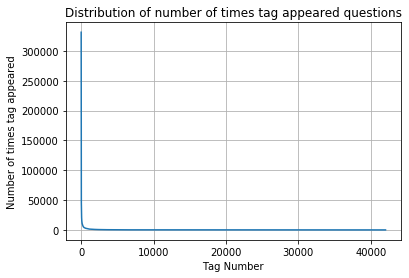

In [35]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel('Tag Number')
plt.ylabel('Number of times tag appeared')
plt.show()

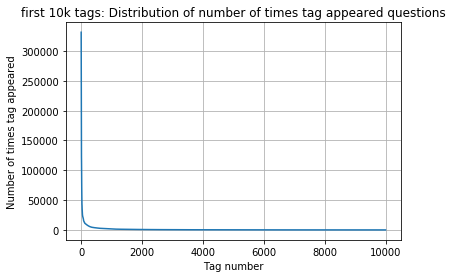

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [36]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

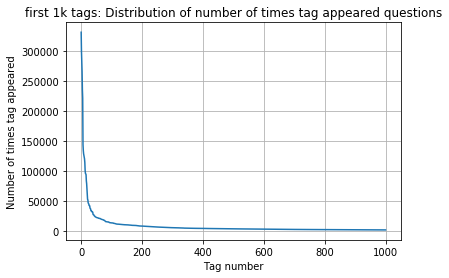

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [37]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

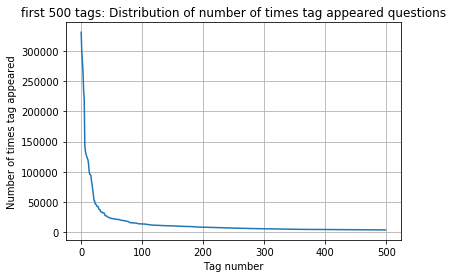

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [38]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

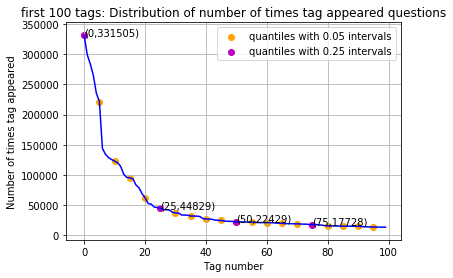

4 [331505  44829  22429  17728]


In [39]:
plt.plot(tag_counts[0:100], c='b') #c='b' - blue color line

# quantiles with 0.05 difference
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html
plt.scatter(x = list(range(0,100,5)), y = tag_counts[0:100:5], c='orange', label = "quantiles with 0.05 intervals")
#for x,y in zip(list(range(0,100,5)), tag_counts[0:100:5]):
    #plt.annotate(s='({},{})'.format(x,y), xy=(x,y), xytext=(x,y))

# quantiles with 0.25 difference
plt.scatter(x = list(range(0,100,25)), y = tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")
for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s='({},{})'.format(x,y), xy=(x,y), xytext=(x,y))
    
    
plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend() #to print the labels on graph
plt.show()
print(len(tag_counts[0:100:25]), tag_counts[0:100:25])

In [40]:
# Store tags occurred greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags occurred greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


In [41]:
(lst_tags_gt_100k)

22             .net
1234        android
2215        asp.net
4337             c#
4346            c++
15900          html
17575           ios
17643        iphone
18069          java
18157    javascript
18608        jquery
23452         mysql
27249           php
29101        python
Name: Tags, dtype: object

<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [42]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206315 datapoints.
[2, 3, 4, 2, 2]


In [43]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899439


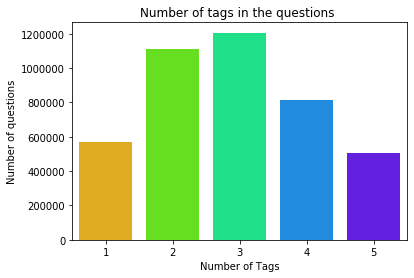

In [44]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

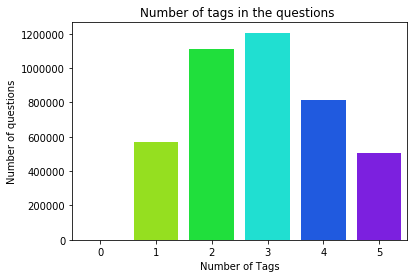

In [45]:
#other way of printing the graph with number of tags per question
sns.countplot(num_of_dup.tag_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

In [46]:
print( "Maximum number of tags per question: %d"%max(num_of_dup.tag_count))
print( "Minimum number of tags per question: %d"%min(num_of_dup.tag_count))
print( "Avg. number of tags per question: %f"% ((sum(num_of_dup.tag_count)*1.0)/len(num_of_dup.tag_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 0
Avg. number of tags per question: 2.899438


<h3>3.2.5 Most Frequent Tags </h3>

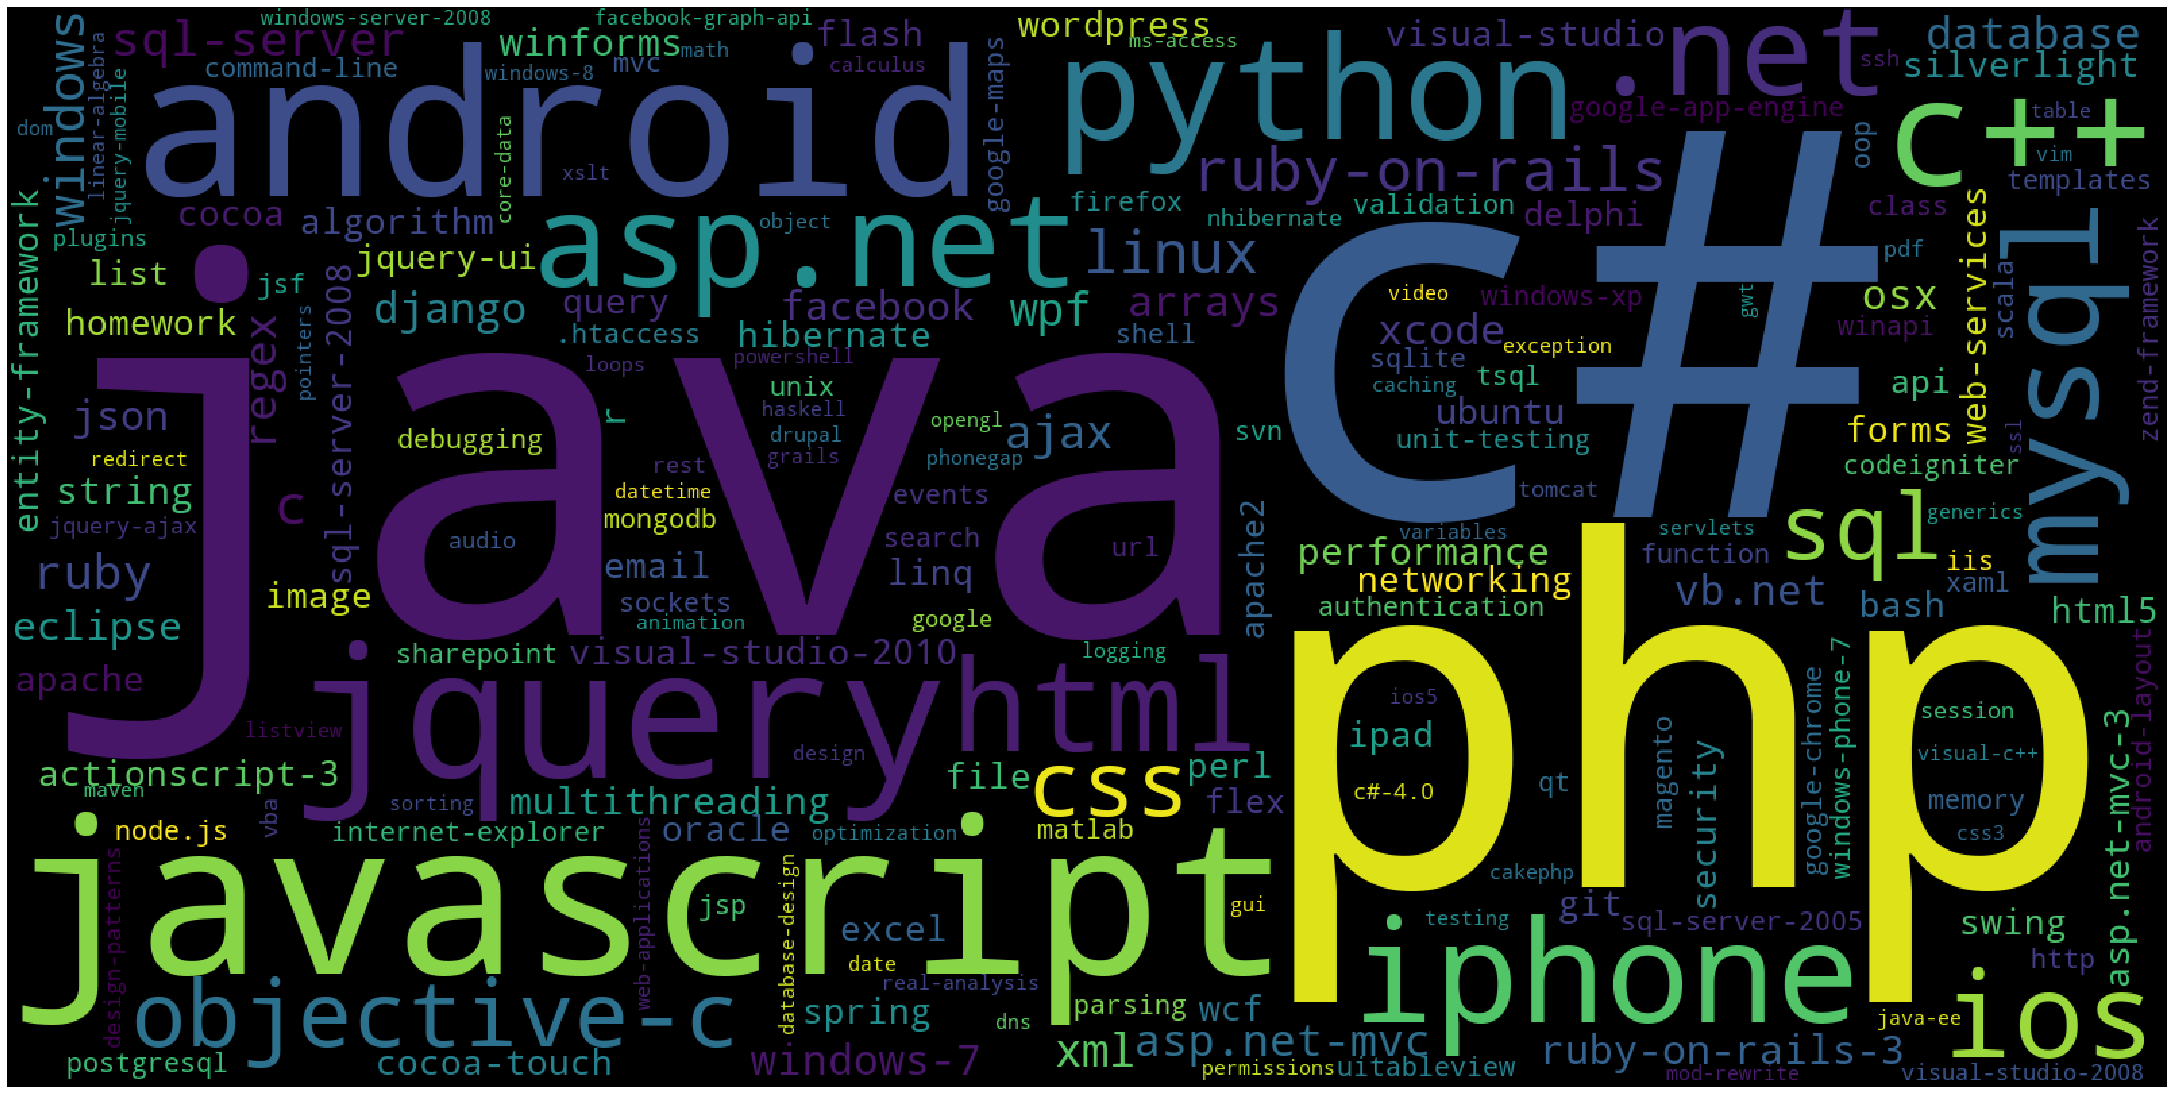

Time taken to run this cell : 0:00:07.155876


In [47]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

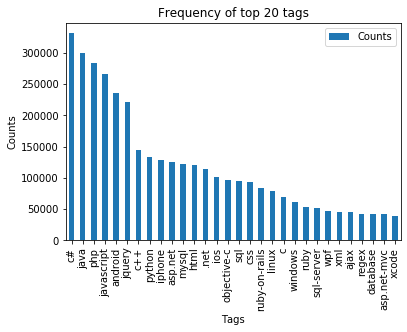

In [50]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.